In [1]:
! pip install nltk

You should consider upgrading via the 'c:\users\keshav anand\appdata\local\programs\python\python37\python.exe -m pip install --upgrade pip' command.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.decomposition import NMF
from sklearn.preprocessing import normalize
from sklearn.datasets import fetch_20newsgroups

In [12]:
newsgroups_train = fetch_20newsgroups(subset='train')
docs = newsgroups_train.data[:10]
print(docs)

["From: lerxst@wam.umd.edu (where's my thing)\nSubject: WHAT car is this!?\nNntp-Posting-Host: rac3.wam.umd.edu\nOrganization: University of Maryland, College Park\nLines: 15\n\n I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.\n\nThanks,\n- IL\n   ---- brought to you by your neighborhood Lerxst ----\n\n\n\n\n", "From: guykuo@carson.u.washington.edu (Guy Kuo)\nSubject: SI Clock Poll - Final Call\nSummary: Final call for SI clock reports\nKeywords: SI,acceleration,clock,upgrade\nArticle-I.D.: shelley.1qvfo9INNc3s\nOrganization: University of Washington\nLines: 1

In [13]:
cv = CountVectorizer()
# generate word counts for words in docs
word_count_vector = cv.fit_transform(docs)
word_count_vector.shape

(10, 881)

In [14]:
cv.get_feature_names()

['083057',
 '10',
 '10mb',
 '11',
 '12',
 '120',
 '12mb',
 '14',
 '15',
 '16',
 '160',
 '161',
 '16899',
 '173',
 '180',
 '185c',
 '1985',
 '1991',
 '1993',
 '1993apr20',
 '1qlbrlinn7rk',
 '1qv87v',
 '1qvfo9innc3s',
 '1r1eu1',
 '20',
 '20mb',
 '21',
 '213',
 '217',
 '23',
 '25mb',
 '27',
 '29',
 '32',
 '333',
 '36',
 '3mb',
 '40mb',
 '44',
 '4h9',
 '4j3',
 '4t',
 '512k',
 '5217',
 '58',
 '5mb',
 '60s',
 '6mb',
 '70s',
 '734340159',
 '800',
 '80mb',
 '96',
 'about',
 'above',
 'abraxis',
 'absurd',
 'acceleration',
 'acceptance',
 'access',
 'accidental',
 'accidentally',
 'active',
 'actual',
 'actually',
 'adapters',
 'add',
 'addition',
 'address',
 'advance',
 'after',
 'agree',
 'aim',
 'all',
 'allegedly',
 'allowed',
 'already',
 'also',
 'although',
 'always',
 'am',
 'amber',
 'amendment',
 'an',
 'analysis',
 'and',
 'another',
 'answer',
 'answered',
 'ansynchronous',
 'any',
 'anybody',
 'anymore',
 'anyone',
 'appearence',
 'apple',
 'appreciated',
 'april',
 'are',
 'aren'

In [19]:
tfidf_transformer = TfidfTransformer()

tf_idf_vector = tfidf_transformer.fit_transform(word_count_vector)

feature_names = cv.get_feature_names()

# get tfidf vector for first document
first_document_vector = tf_idf_vector[2]

# print the vector
df = pd.DataFrame(first_document_vector.T.todense(), index = feature_names, columns = ["tfidf"])
df.sort_values(by = ["tfidf"], ascending = False)

df = pd.read_excel("abcnews-date-text.xlsx")

data_text = df[["headline_text"]].astype("str")
data_text.shape

(1048575, 1)

In [34]:
data_text = data_text.loc[1:100000, :]

In [35]:
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to C:\Users\KESHAV
[nltk_data]     ANAND\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [42]:
stopw = stopwords.words("english")
def stopwords_remove(x):
    terms = x.split(' ')
    terms = [w for w in terms if w not in stopw]
    sentence = ' '.join(terms)
    return sentence

data_text["Refined_headlines"] = data_text["headline_text"].apply(lambda x: stopwords_remove(x))

In [43]:
data_text.head()
#stopw

,headline_text,Refined_headlines
1,act fire witnesses must be aware of defamation,act fire witnesses must aware defamation
2,a g calls for infrastructure protection summit,g calls infrastructure protection summit
3,air nz staff in aust strike for pay rise,air nz staff aust strike pay rise
4,air nz strike to affect australian travellers,air nz strike affect australian travellers
5,ambitious olsson wins triple jump,ambitious olsson wins triple jump


In [44]:
def word_count(x):
    terms = x.split()
    return len(terms)
data_text["word_count"] = data_text["Refined_headlines"].apply(lambda x: word_count(x))

In [45]:
data_text.head()

,headline_text,Refined_headlines,word_count
1,act fire witnesses must be aware of defamation,act fire witnesses must aware defamation,6
2,a g calls for infrastructure protection summit,g calls infrastructure protection summit,5
3,air nz staff in aust strike for pay rise,air nz staff aust strike pay rise,7
4,air nz strike to affect australian travellers,air nz strike affect australian travellers,6
5,ambitious olsson wins triple jump,ambitious olsson wins triple jump,5


In [46]:
data_text["word_count"].describe()

count    99999.000000
mean         5.252923
std          1.036741
min          1.000000
25%          5.000000
50%          5.000000
75%          6.000000
max         10.000000
Name: word_count, dtype: float64

Text(0.5, 0, 'word_count')

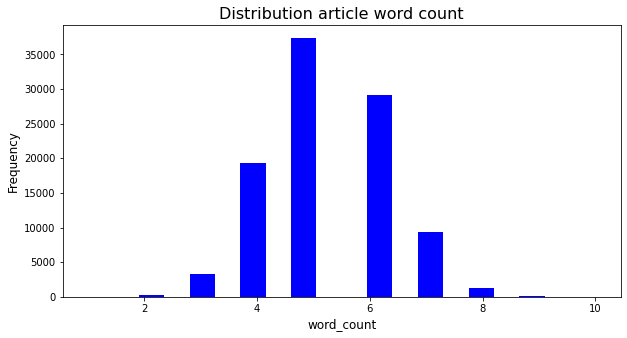

In [48]:
fig = plt.figure(figsize = (10, 5))
plt.hist(data_text["word_count"], bins = 20, color = "blue")
plt.title("Distribution article word count", fontsize = 16)
plt.ylabel("Frequency", fontsize = 12)
plt.xlabel("word_count", fontsize = 12)

In [49]:
headline_sentences = [''.join(text) for text in data_text["Refined_headlines"]]

vectorizer = CountVectorizer(max_features = 5000)
x_counts = vectorizer.fit_transform(headline_sentences)

transformer = TfidfTransformer()
x_tfidf = transformer.fit_transform(x_counts)
x_tfidf_norm = normalize(x_tfidf, norm = 'l1', axis = 1)


In [53]:
num_topics = 5

model = NMF(n_components = num_topics, init = "nndsvd")
model.fit(x_tfidf_norm)

def get_nmf_topics(model, n_top_words):
    feat_names = vectorizer.get_feature_names()
    
    word_dict = {}
    for i in range(num_topics):
        words_ids = model.components_[i].argsort()[:-n_top_words-1:-1]
        words = [feat_names[key] for key in words_ids]
        
        word_dict['Topic #' + '{:02d}'.format(i+1)] = words
    return pd.DataFrame(word_dict)

In [55]:
get_nmf_topics(model, 30)

,Topic #01,Topic #02,Topic #03,Topic #04,Topic #05
0,police,us,man,council,new
1,probe,iraq,charged,govt,zealand
2,investigate,killed,court,plan,laws
3,missing,troops,murder,water,president
4,search,iraqi,dies,urged,hospital
5,death,war,face,nsw,set
6,shooting,says,car,says,chief
7,fatal,baghdad,crash,call,record
8,car,soldiers,killed,boost,home
9,crash,soldier,hospital,wa,deal
